# Fire Detection System with YOLO

In this fire detection system, it leverages a You Only Look Once (YOLO) deep learning model to identify the presence of fire in images. YOLO is a powerful object detection algorithm known for its speed and accuracy.

Fire detection system can play a crucial role in ensuring public safety and minimizing property damage. Some potential applications of YOLO-based fire detection model might help real-time fire alarms in buildings, which can be integrated into surveillance systems to trigger alarms upon detecting fire in real-time. Additionally, deploying the model with cameras strategically placed in forests can enable early detection of wildfires.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection


In [2]:
%pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.109 🚀 Python-3.10.16 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7933MiB)
Setup complete ✅ (16 CPUs, 14.8 GB RAM, 331.4/467.9 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WNYGKhksOHQ85H6IABth")
project = rf.workspace("firedetection-le3lj").project("fire-vqbia-zdpni")
version = project.version(1)
dataset = version.download("yolov8")


Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [6]:
!pwd

/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection


In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=45 imgsz=800 plots=True

Traceback (most recent call last):
  File "/home/cacc/anaconda3/envs/ml/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/home/cacc/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 960, in entrypoint
    model = YOLO(model, task=task)
  File "/home/cacc/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/models/yolo/model.py", line 54, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/home/cacc/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/home/cacc/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/home/cacc/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/nn/tasks.py", line 1304, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/home/cacc

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					 train_batch1.jpg
confusion_matrix_normalized.png			 train_batch2.jpg
confusion_matrix.png				 train_batch5285.jpg
events.out.tfevents.1744849308.paradiso.16272.0  train_batch5286.jpg
F1_curve.png					 train_batch5287.jpg
labels_correlogram.jpg				 val_batch0_labels.jpg
labels.jpg					 val_batch0_pred.jpg
P_curve.png					 val_batch1_labels.jpg
PR_curve.png					 val_batch1_pred.jpg
R_curve.png					 val_batch2_labels.jpg
results.csv					 val_batch2_pred.jpg
results.png					 weights
train_batch0.jpg


/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection


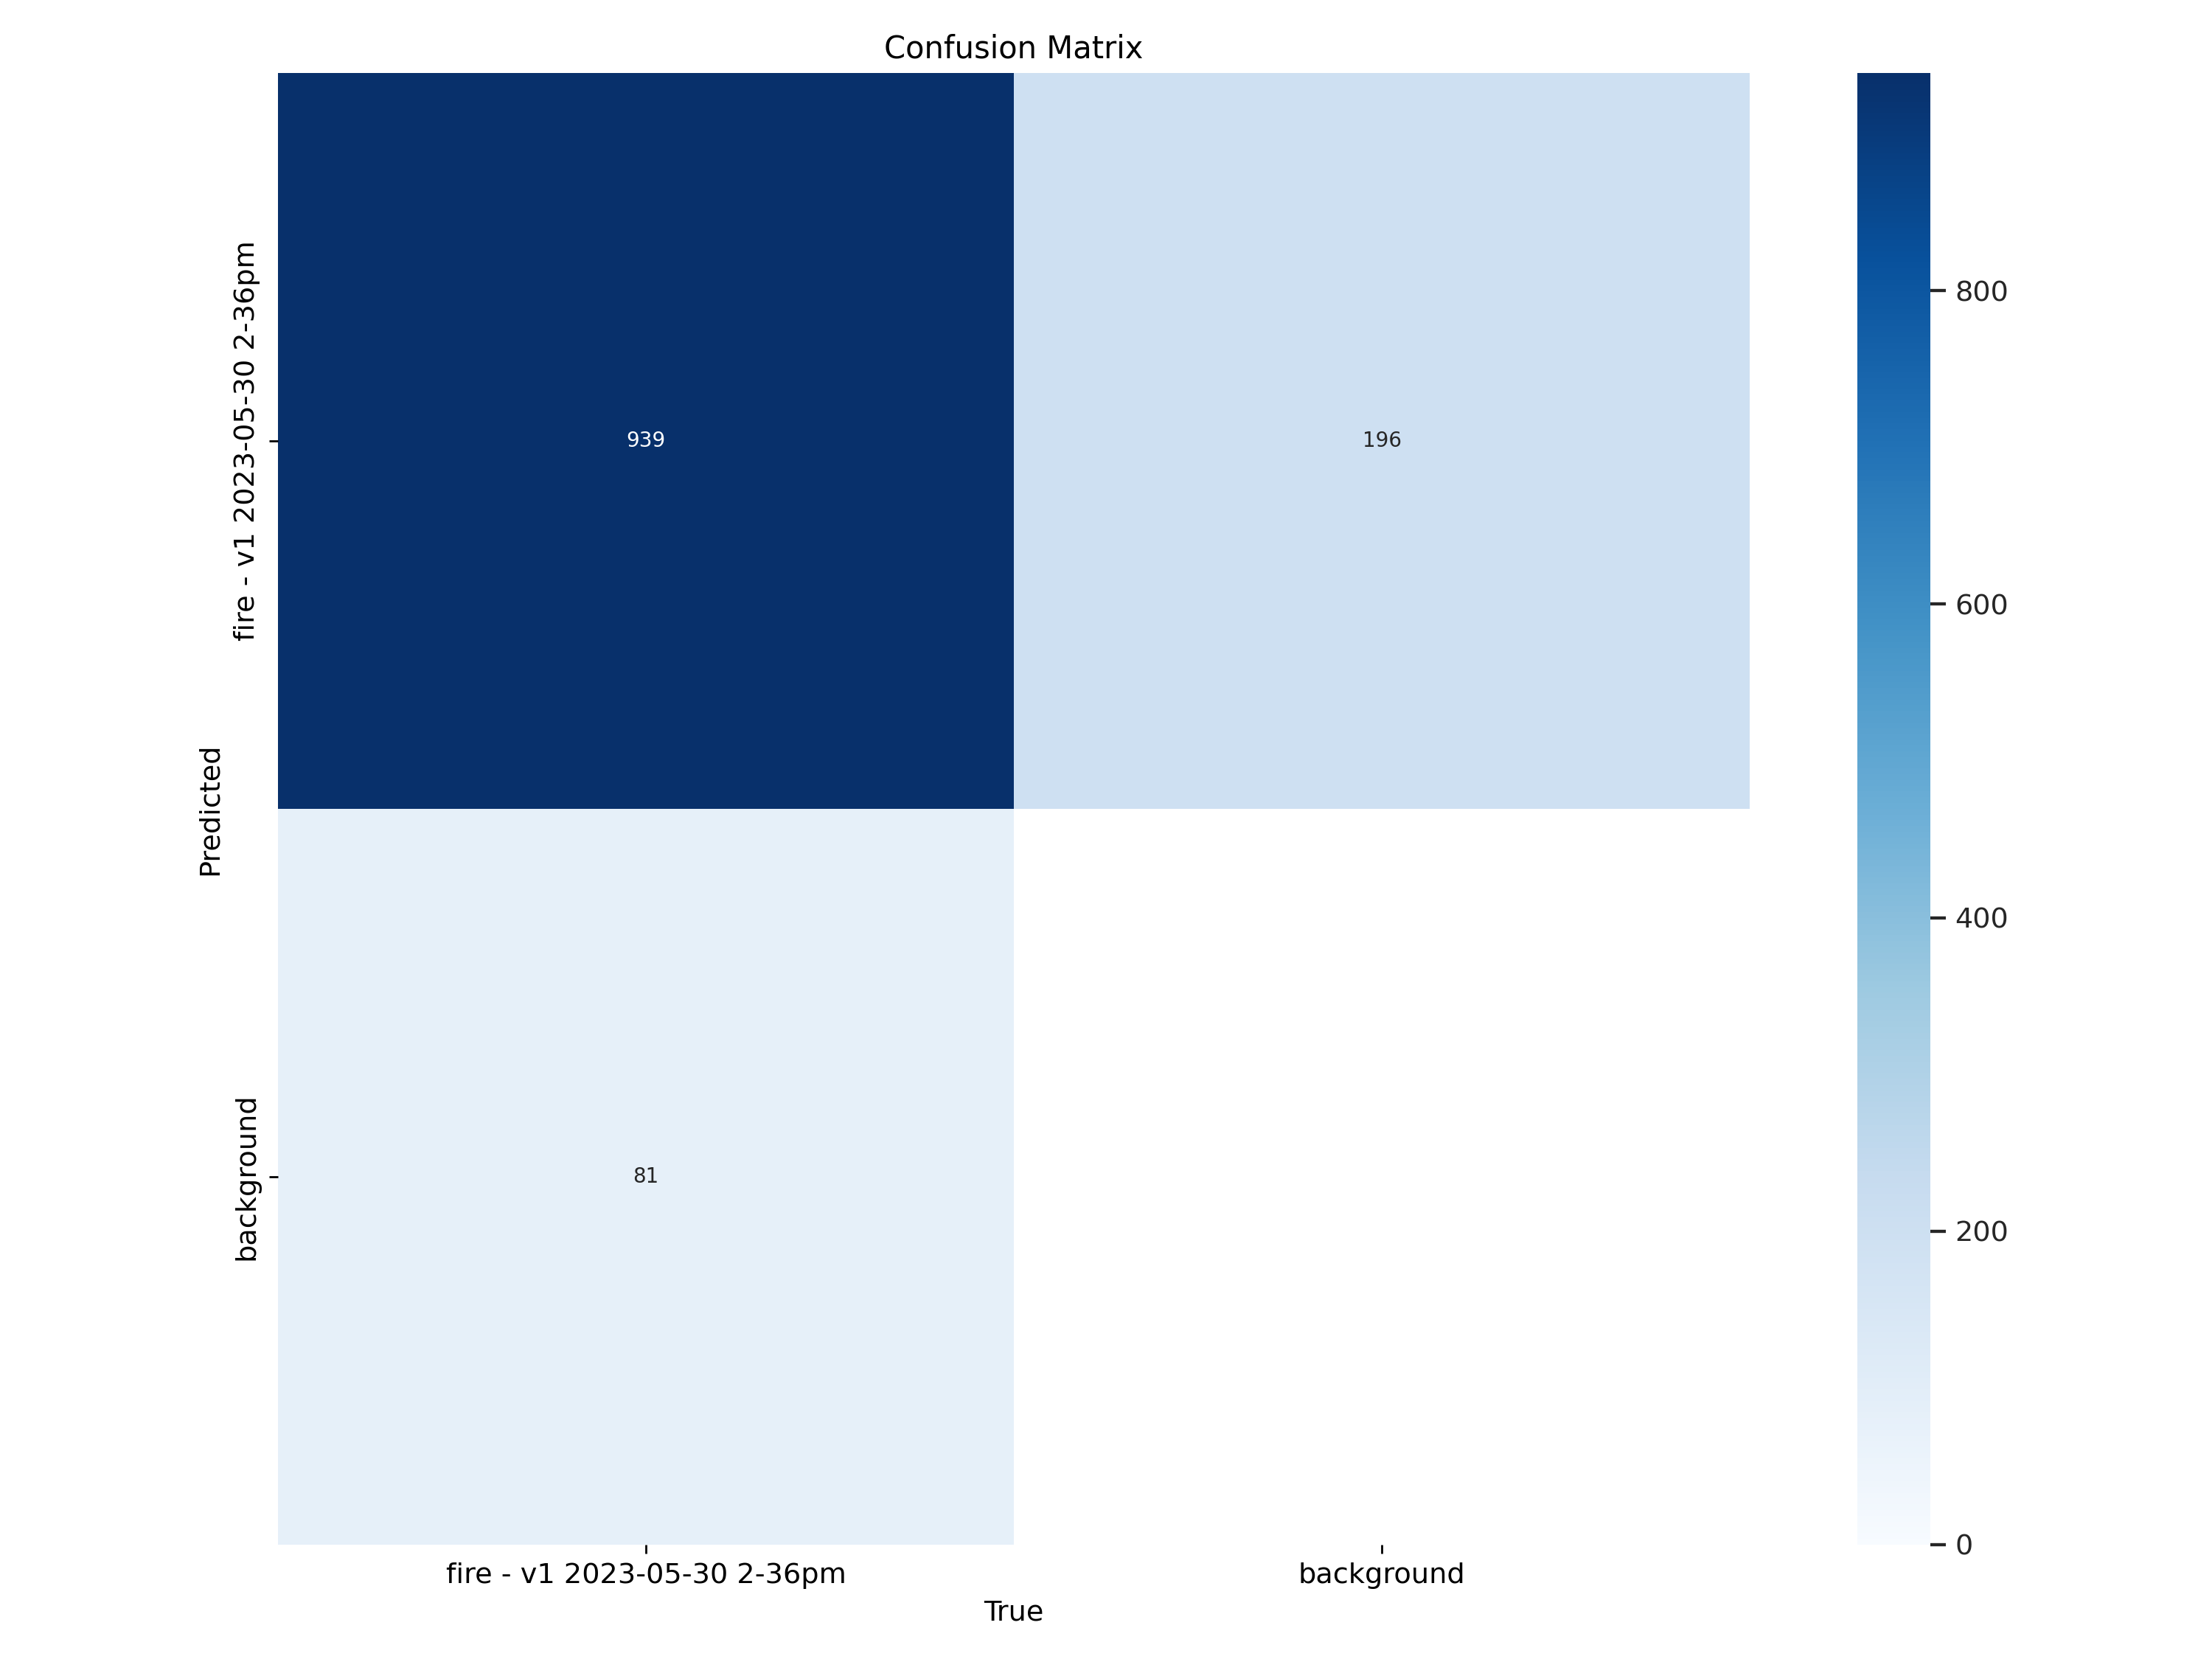

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection


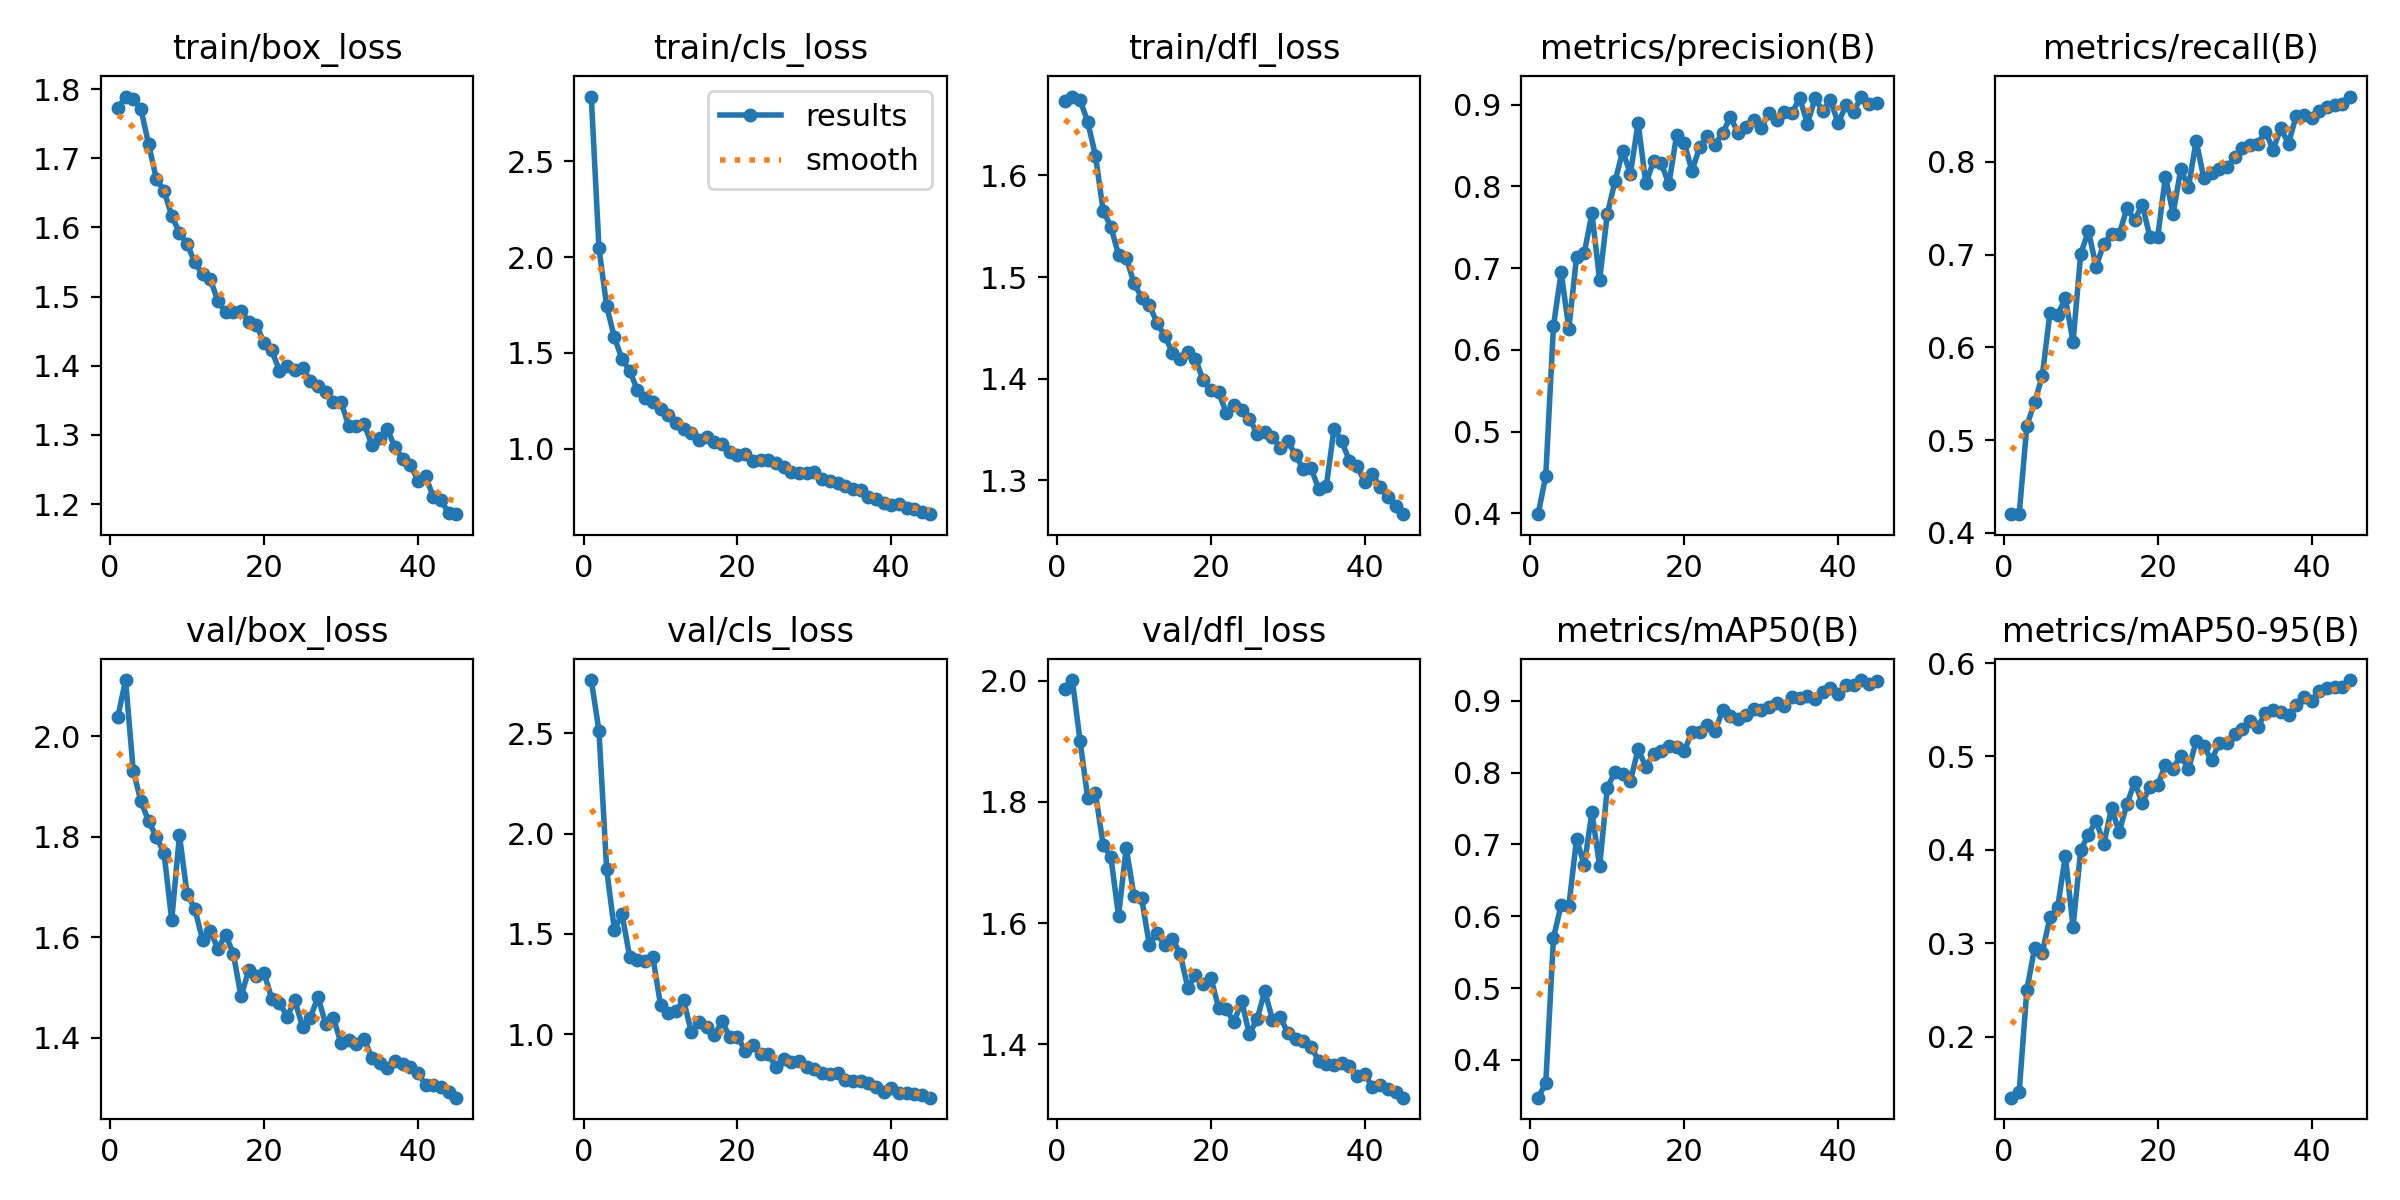

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection


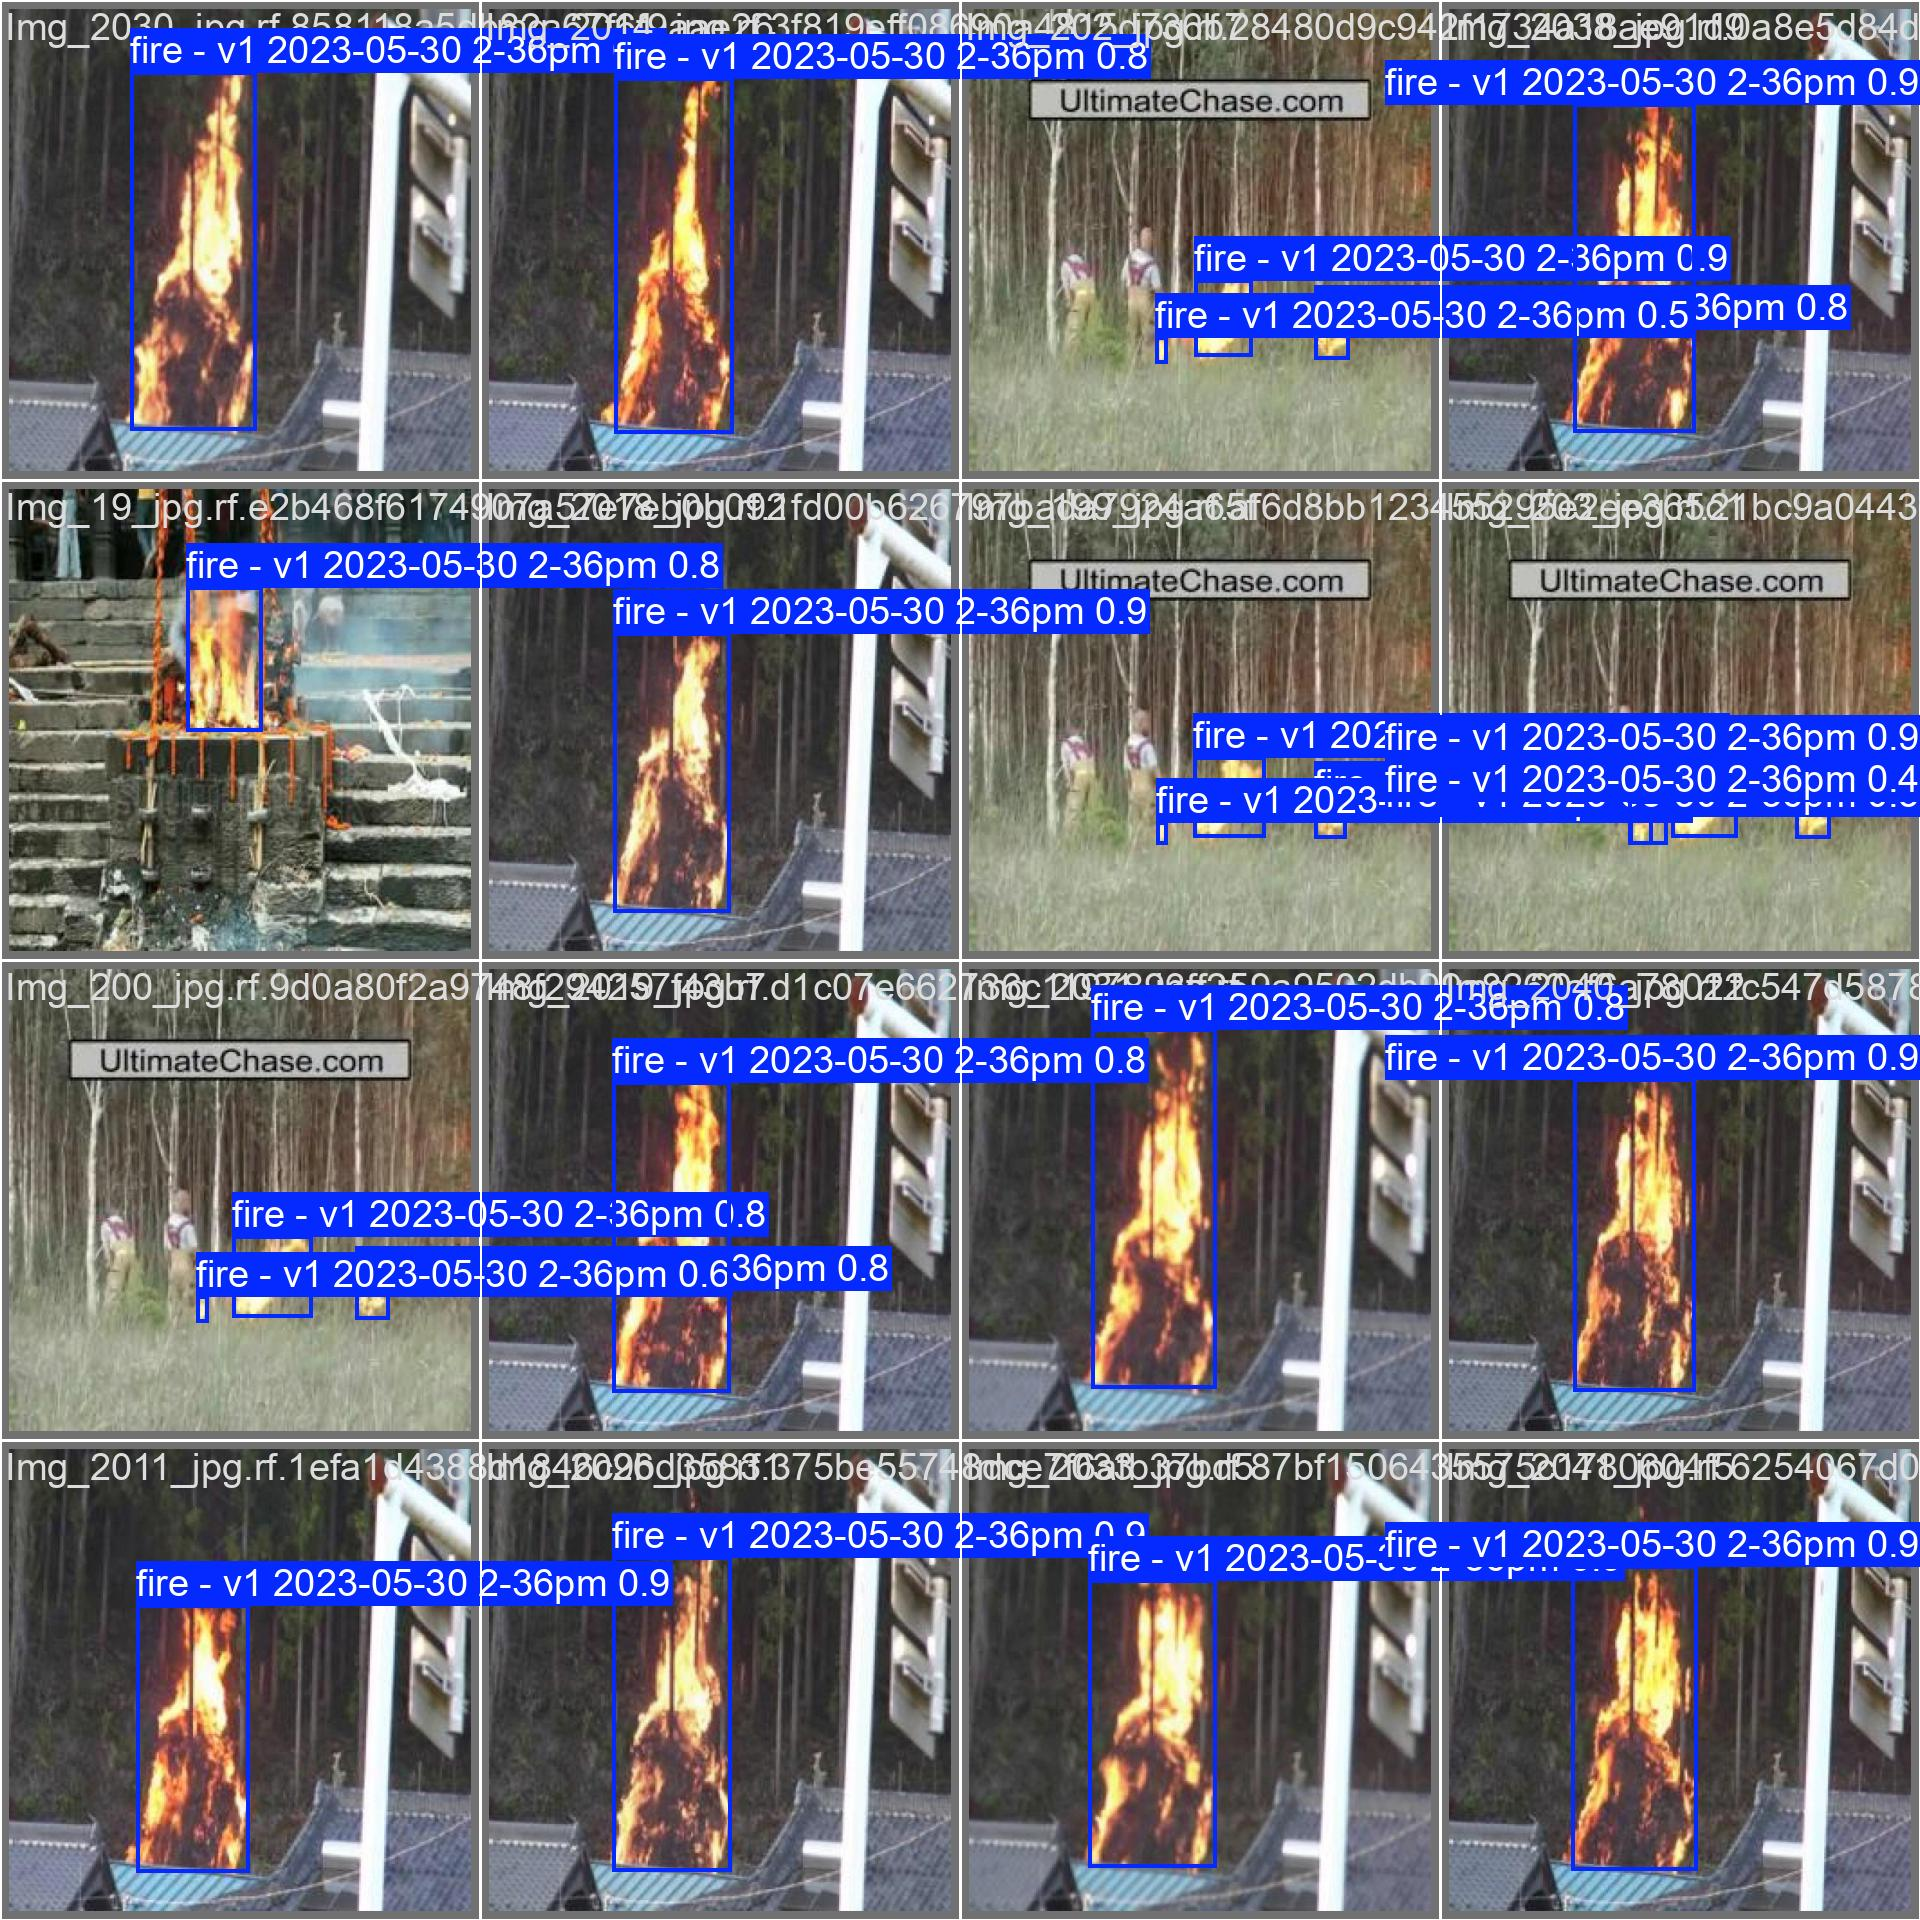

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [20]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection
Ultralytics 8.3.109 🚀 Python-3.10.16 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7933MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatew
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        601       1020      0.905      0.871      0.929      0.582
Speed: 0.8ms preprocess, 4.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection
Ultralytics 8.3.109 🚀 Python-3.10.16 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7933MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/301 /home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection/FIRE-1/test/images/Img_1021_jpg.rf.ebb6a444dfc4a8ae87e581251c4ccf66.jpg: 800x800 1 fire - v1 2023-05-30 2-36pm, 4.0ms
image 2/301 /home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection/FIRE-1/test/images/Img_1024_jpg.rf.b748e1090230264765edd5772046a77a.jpg: 800x800 1 fire - v1 2023-05-30 2-36pm, 4.1ms
image 3/301 /home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection/FIRE-1/test/images/Img_1027_jpg.rf.52ac4b074f4b1cd3830972c1a200dd7d.jpg: 800x800 1 fire - v1 2023-05-30 2-36pm, 4.1ms
image 4/301 /home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection/FIRE-1/test/imag

**NOTE:** Let's take a look at few results.

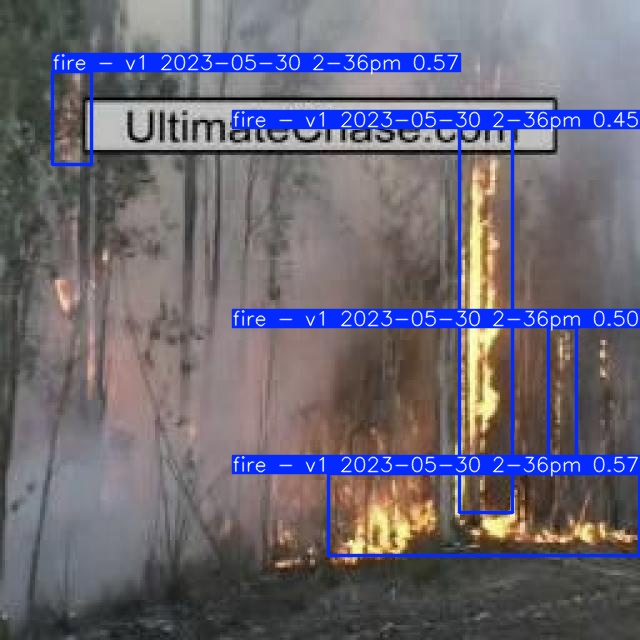

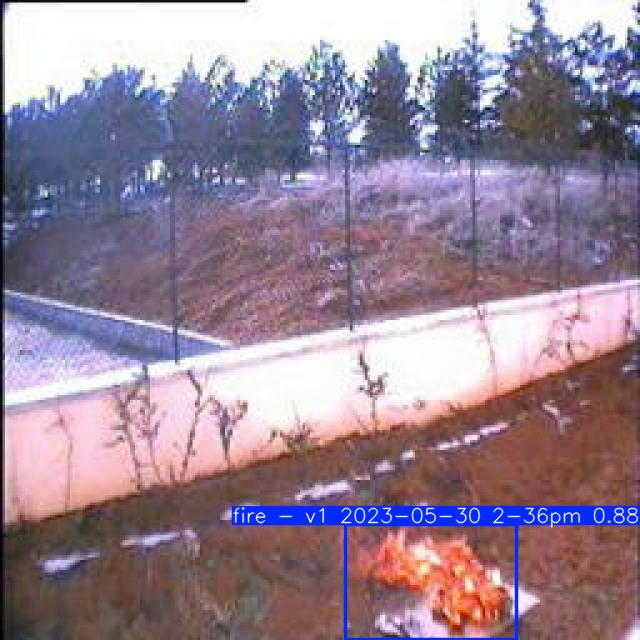

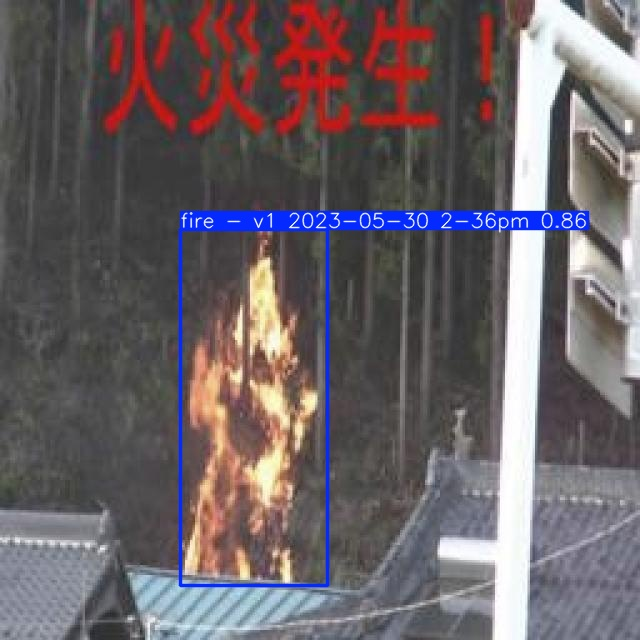

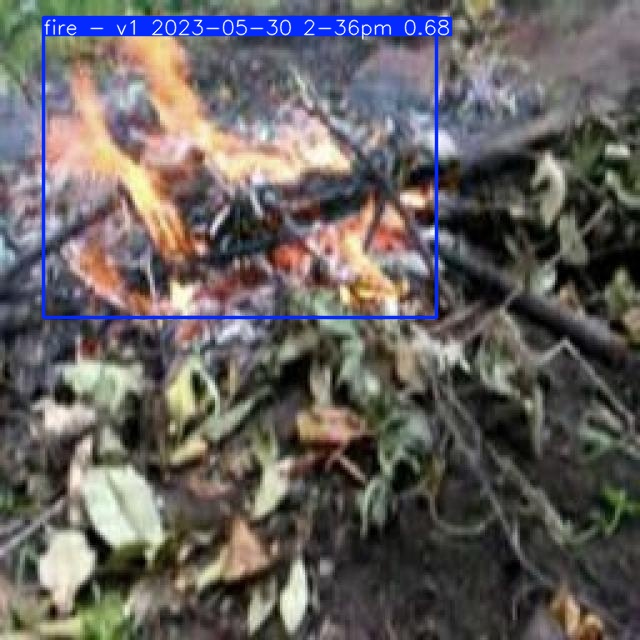

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[3:7]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [16]:
# Navigate to the base directory
!cd {HOME}

# Export the trained model to ONNX format
!yolo task=detect mode=export model={HOME}/runs/detect/train/weights/best.pt format=onnx


Ultralytics 8.3.109 🚀 Python-3.10.16 torch-2.6.0+cu124 CPU (AMD Ryzen 7 7840H w/ Radeon 780M Graphics)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection/runs/detect/train/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 5, 13125) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 106.0 kB/s eta 0:00:0000:0400:06

requirements: AutoUpdate success ✅ 125.8s, installed 2 packages: ['onnx>=1.12.0', 'onnxslim']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 126.6s, saved as '/home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection/runs/detect/train

In [17]:
%pip install onnxruntime onnxruntime-tools


Note: you may need to restart the kernel to use updated packages.


In [18]:
from onnxruntime.quantization import quantize_dynamic, QuantType

# Define paths for the original and quantized models
model_path = f"{HOME}/runs/detect/train/weights/best.onnx"
quantized_model_path = f"{HOME}/runs/detect/train/weights/best_quantized.onnx"

# Perform dynamic quantization
quantize_dynamic(
    model_path,
    quantized_model_path,
    weight_type=QuantType.QUInt8  # Use 8-bit unsigned integers for weights
)

print(f"Quantized model saved to: {quantized_model_path}")


Quantized model saved to: /home/cacc/Repositories/WildfireDetection/AlgorithmsResearch/gatewaydetection/runs/detect/train/weights/best_quantized.onnx
